In [1]:
!pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.8/254.8 kB 6.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.5 MB/s eta 0:00:00


In [2]:
from functools import partial 
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

In [3]:
from neuralforecast import NeuralForecast
from ray import tune
from neuralforecast.auto import AutoLSTM, AutoNLinear
import pandas as pd
import pprint
from neuralforecast.losses.numpy import mae, mse
import matplotlib.pyplot as plt
import os
import glob
import torch
import torch.optim as optim


df = pd.DataFrame(columns=['coordinates','date','avg'])

for file in glob.glob(os.path.join("/kaggle/input/global-rainfall/rainfall", "*.csv")) :
    temp_df = pd.read_csv(file, header = 0)
    df = pd.concat([df, temp_df], ignore_index=True)
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={"coordinates": "unique_id", "date": "ds", "avg": "y"})  # 重命名欄位以符合模型格式

print(df)

horizon = 12
config = {
       "learning_rate": tune.choice([1e-4]),                                     # Initial Learning rate
       "max_steps": tune.choice([8000]),                                         # Number of steps
       "input_size": tune.choice([12]),                                 # input_size = multiplier * horizon
       "val_check_steps": tune.choice([800]),                                    # Compute validation every 100 epochs
       "random_seed": 2486,
       "optimizer": optim.AdamW,
}


models = [AutoNLinear(h=horizon, config=config)]
nf = NeuralForecast(models=models, freq='M')
n_time = len(df.ds.unique())
val_size = int(.2 * n_time)
test_size = horizon
Y_hat_df = nf.cross_validation(df=df, val_size=val_size, test_size=test_size, n_windows=None)

(_train_tune pid=381) /opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=381)   return torch.load(io.

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 22:  86%|████████▌ | 30/35 [00:00<00:00, 121.24it/s, v_num=0, train_loss_step=41.50, train_loss_epoch=51.70]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   3%|▎         | 1/35 [00:00<00:00, 256.67it/s]
(_train_tune pid=381) 
Validation DataLoader 0:   6%|▌         | 2/35 [00:00<00:00, 201.94it/s]
(_train_tune pid=381) 
Validation DataLoader 0:  63%|██████▎   | 22/35 [00:00<00:00, 195.22it/s]
(_train_tune pid=381) 
Epoch 22:  89%|████████▊ | 31/35 [00:00<00:00, 65.64it/s, v_num=0, train_loss_step=54.20, train_loss_epoch=51.70, valid_loss=50.40]


/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Epoch 45:  71%|███████▏  | 25/35 [00:00<00:00, 133.59it/s, v_num=0, train_loss_step=50.40, train_loss_epoch=39.90, valid_loss=50.40]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  49%|████▊     | 17/35 [00:00<00:00, 227.40it/s]
(_train_tune pid=381) 
Epoch 68:  57%|█████▋    | 20/35 [00:00<00:00, 112.27it/s, v_num=0, train_loss_step=38.60, train_loss_epoch=34.60, valid_loss=38.40]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  29%|██▊       | 10/35 [00:00<00:00, 207.53it/s]
(_train_tune pid=381) 
Validation DataLoader 0:  31%|███▏      | 11/35 [00:00<00:00, 205.61it/s]
(_train_tune pid=381) 
Validation DataLoader 0:  89%|████████▊ | 31/35 [00:00<00:00, 196.55it/s]
(_train_tune pid=381) 
Epoch 91:  43%|████▎     | 15/35 [00:00<00:00, 134.00it/s, v_num=0, train_loss_step=30.00, train_loss_epoch=31.20, valid_loss=33.60]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  17%|█▋        | 6/35 [00:00<00:00, 176.06it/s]
(_

(_train_tune pid=480) /opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=480)   return torch.load(io.

Epoch 22:  86%|████████▌ | 30/35 [00:00<00:00, 117.82it/s, v_num=0, train_loss_step=41.50, train_loss_epoch=51.70]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  40%|████      | 14/35 [00:00<00:00, 219.73it/s]
(_train_tune pid=480) 
Validation DataLoader 0:  43%|████▎     | 15/35 [00:00<00:00, 217.91it/s]
(_train_tune pid=480) 
Validation DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 211.25it/s]
(_train_tune pid=480) 
Epoch 45:  71%|███████▏  | 25/35 [00:00<00:00, 112.40it/s, v_num=0, train_loss_step=50.40, train_loss_epoch=39.90, valid_loss=50.40]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  37%|███▋      | 13/35 [00:00<00:00, 200.92it/s]
(_train_tune pid=480) 
Validation DataLoader 0:  91%|█████████▏| 32/35 [00:00<00:00, 191.92it/s]
(_train_tune pid=480) 
Validation DataLoader 0:  94%|█████████▍| 33/35 [00:00<00:00, 190.65it/s]
(_train_tune pid=480) 
Epoch 68:  57%|█████▋    | 20/35 [00:00<00:00, 114.08it/s, v_num=0, train_loss

2024-10-05 16:26:21,036	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2024-10-05 16:26:21,048	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2024-10-05_16-23-33' in 0.0103s.


Epoch 114:   9%|▊         | 3/35 [00:00<00:00, 130.00it/s, v_num=0, train_loss_step=33.70, train_loss_epoch=28.90, valid_loss=31.00] 


2024-10-05 16:26:21,232	WARNING tune.py:1056 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: Tuner.restore(path="/root/ray_results/_train_tune_2024-10-05_16-23-33", trainable=...)
2024-10-05 16:26:21,259	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 8 trial(s):
- _train_tune_236dc_00002: FileNotFoundError('Could not fetch metrics for _train_tune_236dc_00002: both result.json and progress.csv were not found at /root/ray_results/_train_tune_2024-10-05_16-23-33/_train_tune_236dc_00002_2_input_size=12,learning_rate=0.0001,max_steps=8000,val_check_steps=800_2024-10-05_16-23-55')
- _train_tune_236dc_00003: FileNotFoundError('Could not fetch metrics for _train_tune_236dc_00003: both result.json and progress.csv were not found at /root/ray_results/_train_tune_2024-10-05_16-23-33/_train_tune_236dc_00003_3_input_size=12,learning_rate=0.0001,max_steps=8000,val_check_steps=800_2024-10-05_16-23-55')
- _train_tune_236dc_00004: File

Epoch 114:  29%|██▊       | 10/35 [00:00<00:00, 118.80it/s, v_num=0, train_loss_step=31.40, train_loss_epoch=28.90, valid_loss=31.00]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  23%|██▎       | 8/35 [00:00<00:00, 209.28it/s]
(_train_tune pid=480) 
Validation DataLoader 0:  89%|████████▊ | 31/35 [00:00<00:00, 215.61it/s]
(_train_tune pid=480) 
Validation DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 212.78it/s]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [12]:
y_true = Y_hat_df.y.values
y_hat = Y_hat_df['AutoNLinear'].values
print(nf.models[0].results.get_best_result().config)
n_series = len(df.unique_id.unique())

y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)

model = nf.models[0].model
nf.save(path='/kaggle/working/model', overwrite=True)

{'learning_rate': 0.0001, 'max_steps': 8000, 'input_size': 12, 'val_check_steps': 800, 'random_seed': 2486, 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'h': 12, 'loss': MAE(), 'valid_loss': MAE()}


Parsed results
2. y_true.shape (n_series, n_windows, n_time_out):	 (1113, 1, 12)
2. y_hat.shape  (n_series, n_windows, n_time_out):	 (1113, 1, 12)
MAE:  27.872074706283126
MSE:  2987.890811137207


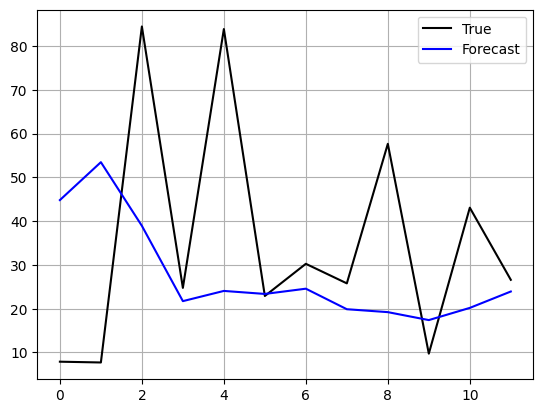

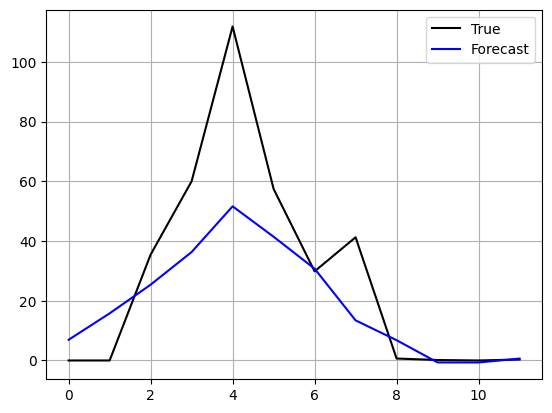

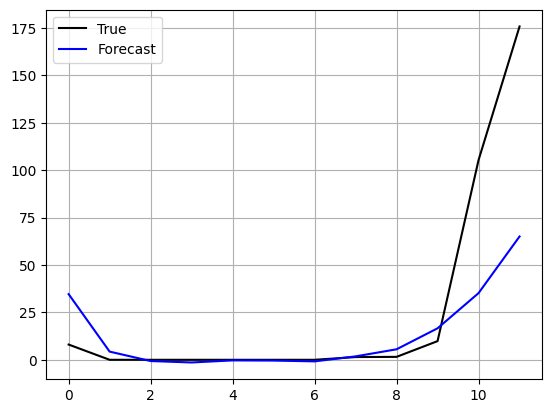

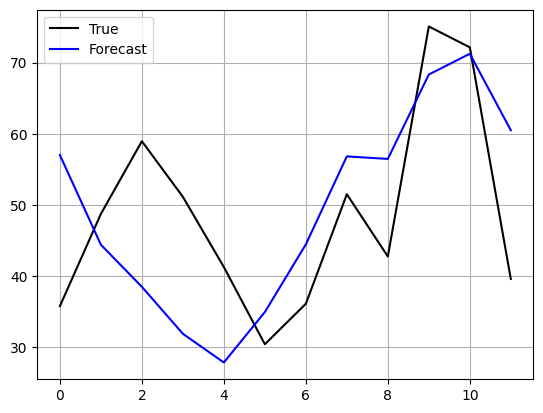

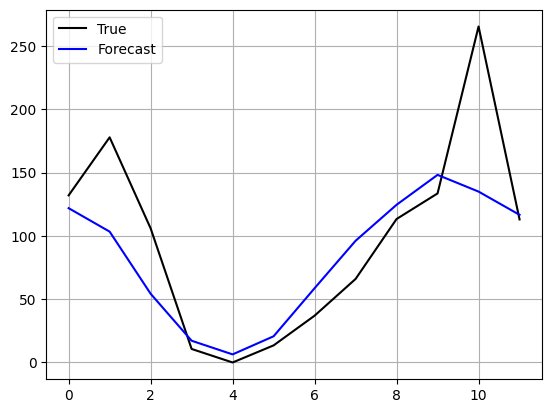

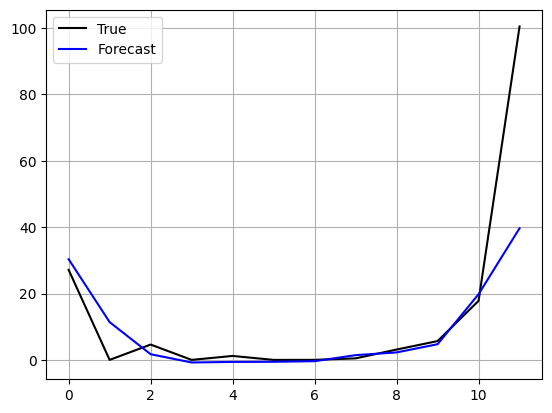

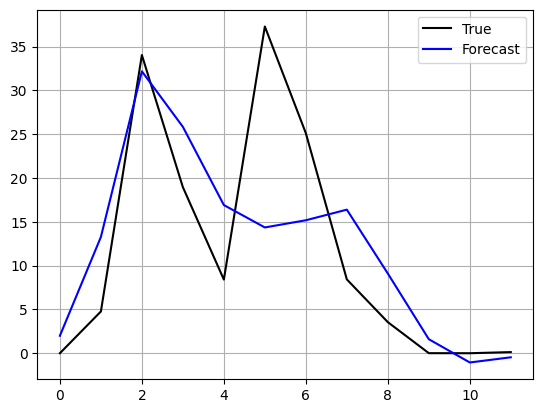

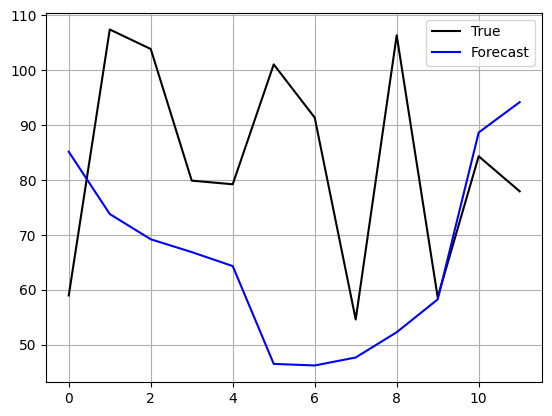

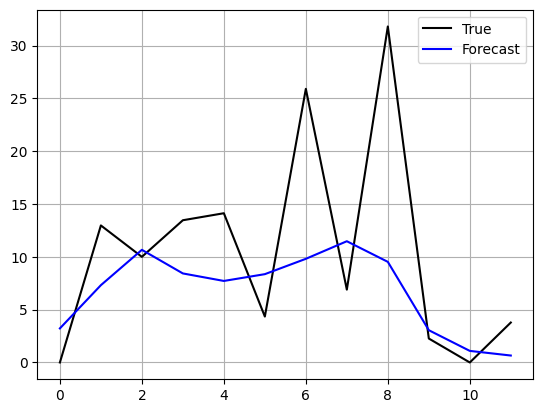

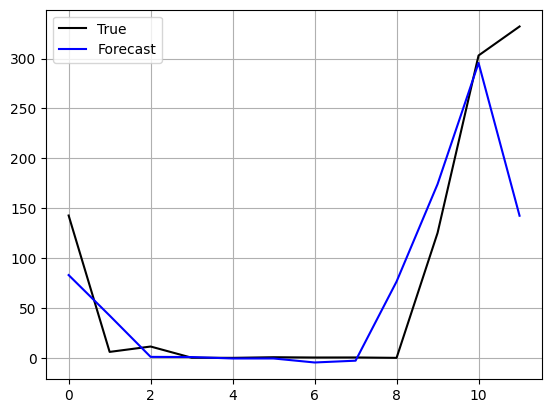

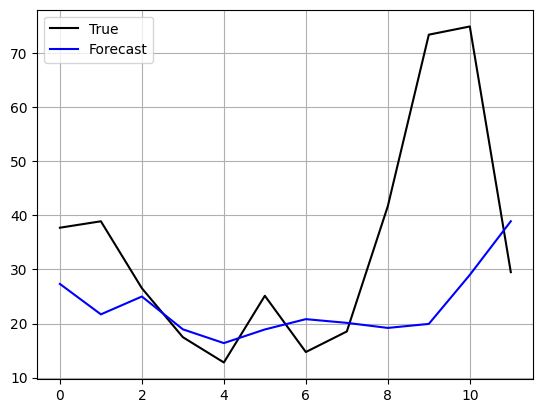

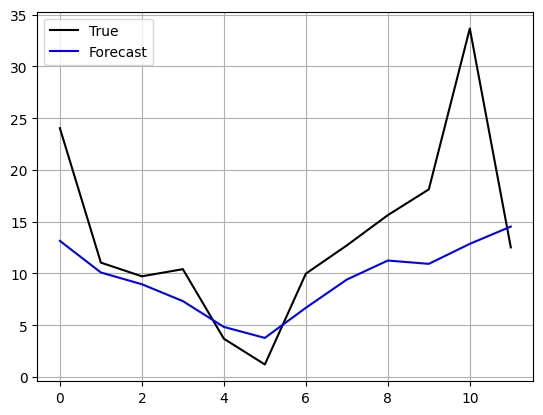

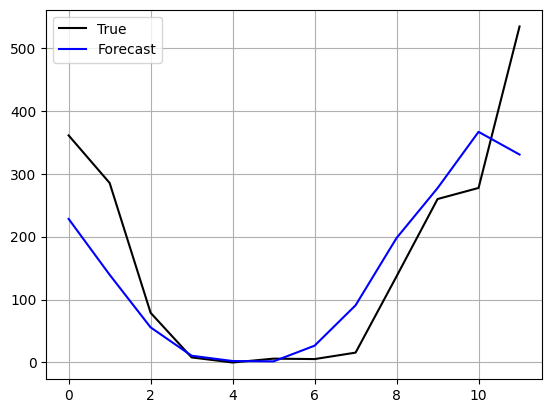

<Figure size 640x480 with 0 Axes>

In [13]:
print('Parsed results')
print('2. y_true.shape (n_series, n_windows, n_time_out):\t', y_true.shape)
print('2. y_hat.shape  (n_series, n_windows, n_time_out):\t', y_hat.shape)
print('MAE: ', mae(y_hat, y_true))
print('MSE: ', mse(y_hat, y_true))
for i in range (618, 1100, 40):
    plt.plot(y_true[i,0,:], c='black', label='True')
    plt.plot(y_hat[i,0,:], c='blue', label='Forecast')
    plt.legend()
    plt.grid()
    plt.show()
    plt.clf()

In [6]:
# !pip install global-land-mask

In [7]:
# !pip install climateserv

In [8]:
# from global_land_mask import globe
# import numpy as np

# # 定義經度和緯度範圍，每0.5度切一格
# lon = np.arange(-180, 180 , 1)
# lat = np.arange(-45, 60+ 1, 1)
# lon = np.round(lon, 1)
# lat = np.round(lat, 1)
# # 創建經度和緯度的網格
# lon_grid, lat_grid = np.meshgrid(lon, lat)

# # 檢查每個點是否在海洋中
# is_in_land = globe.is_land(lat_grid, lon_grid)
# print(len(is_in_land))

# k=0
# for i in range(lat_grid.shape[0]):
#     for j in range(lon_grid.shape[1]):
#         if is_in_land[i, j]:
#             k += 1
# print(k)
# # 0.1 1051
# # 1114 + 1271 +821+ 2811 +2625 +706=9348 分六洲
# # 11571

In [9]:
# from global_land_mask import globe
# import numpy as np
# import pandas as pd
# import os
# import climateserv

# # 定義經度和緯度範圍
# lat = np.arange(-66.5, 66.5 + 40, 40)
# lon = np.arange(-180, 180 + 80, 80)

# lon_grid, lat_grid = np.meshgrid(lon[:-1], lat[:-1])
# is_in_land = globe.is_land(lat_grid, lon_grid)

# DatasetType = 0  # Specify the dataset name or ID
# OperationType = 'Average'
# EarliestDate = '07/31/2023'
# LatestDate = '07/31/2024'
# SeasonalEnsemble = ''  # Specify the ensemble statistic
# SeasonalVariable = ''  # Specify the variable of interest
# Outfile = 'o1.csv'
# # 定義儲存總檔案
# # output_file = 'all_points_data.csv'

# # if not os.path.exists(output_file):
# #     with open(output_file, 'w') as f:
# #         f.write('coordinates,date,avg\n')

# # 遍歷經緯度網格，針對陸地點進行資料請求
# for i in range(lat_grid.shape[0]):
#     for j in range(lon_grid.shape[1]):
#         if is_in_land[i, j]:
#             x = lon_grid[i, j]
#             y = lat_grid[i, j]

#             # 生成四邊形座標
#             GeometryCoords = [
#                 [x - 0.01, y + 0.01],
#                 [x + 0.01, y + 0.01],
#                 [x + 0.01, y - 0.01],
#                 [x - 0.01, y - 0.01],
#                 [x - 0.01, y + 0.01],
#             ]

#             # 模擬 ClimateSERV API 資料請求 (這裡假設API返回 'o1.csv')
#             climateserv.api.request_data(
#                 DatasetType,
#                 OperationType,
#                 EarliestDate,
#                 LatestDate,
#                 GeometryCoords,
#                 SeasonalEnsemble,
#                 SeasonalVariable,
#                 Outfile,
#             )

# #             df = pd.read_csv('o1.csv', skiprows=1, header=0)
# #             df['longitude'] = x
# #             df['latitude'] = y
# #             df['coordinates'] = '(' + df['longitude'].astype(str) + ', ' + df['latitude'].astype(str) + ')'
# #             df = df[['coordinates', 'date', 'avg']]
# # #             df = df[df['date'] != 'JobID']
# #             filename = f"data_{x}_{y}.csv"
# #             df.to_csv(filename, index=False)
# # df = pd.read_csv('data_-100_53.5.csv', skiprows=0, header=0)
# # print(df)